In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm

In [2]:
data = loadmat('ex6data1.mat')

In [5]:
X = data['X']
y = data['y']

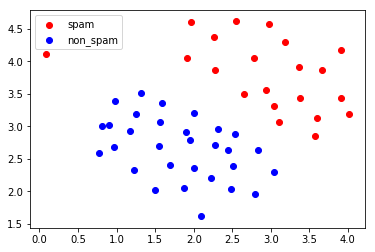

In [42]:
mask = y.flatten() == 1
spam = plt.scatter(X[mask][:,0], X[mask][:,1], color = 'red')
non_spam = plt.scatter(X[~mask][:,0], X[~mask][:,1], color = 'blue')
plt.legend((spam, non_spam), ('spam', 'non_spam'))
plt.show()

In [28]:
C = 1

In [30]:
model = svm.SVC(kernel='linear', C=C)
model.fit(X, y.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [33]:
def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [34]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

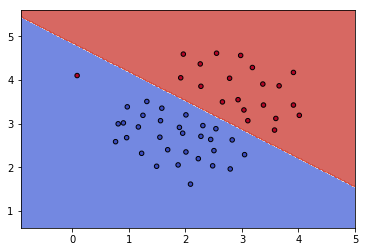

In [39]:
clf, title, ax = model, 'SVC with linear kernel', plt
plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.cool
              warm, alpha=0.8)
ax.scatter(X0, X1, c=y.flatten(), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

In [45]:
def gaussianKernel(x1, x2, sigma):
    return np.exp(-np.sum((x1 - x2)**2) / (2*sigma**2))

In [46]:
x1 = np.array((1,2,1))
x2 = np.array((0,4,-1))
sigma = 2
gaussianKernel(x1, x2, sigma)

0.32465246735834974

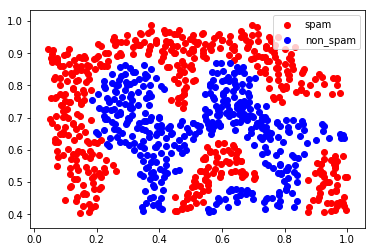

In [72]:
data = loadmat('ex6data2.mat')
X = data['X']
y = data['y']
mask = y.flatten() == 1
spam = plt.scatter(X[mask][:,0], X[mask][:,1], color = 'red')
non_spam = plt.scatter(X[~mask][:,0], X[~mask][:,1], color = 'blue')
plt.legend((spam, non_spam), ('spam', 'non_spam'))
plt.show()

In [55]:
C = 100
sigma = 10

In [73]:
model = svm.SVC(kernel='rbf', C=C, gamma=sigma)
model.fit(X, y.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.9698725376593279

In [80]:
np.mean(pred != y).shape

()

In [52]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

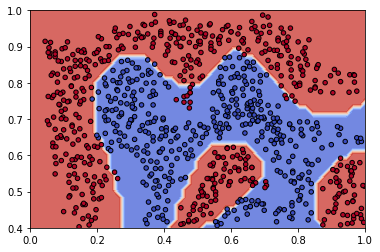

In [68]:
clf, title, ax = model, 'SVC with rbf kernel', plt
plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.flatten(), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.xlim(0, 1)
ax.ylim(0.4, 1)
plt.show()

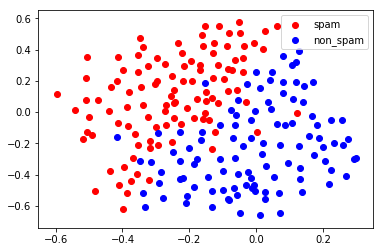

In [92]:
data = loadmat('ex6data3.mat')
X = data['X']
y = data['y']
mask = y.flatten() == 1
spam = plt.scatter(X[mask][:,0], X[mask][:,1], color = 'red')
non_spam = plt.scatter(X[~mask][:,0], X[~mask][:,1], color = 'blue')
plt.legend((spam, non_spam), ('spam', 'non_spam'))
plt.show()

In [93]:
Xval = data['Xval']
yval = data['yval']

In [109]:
def dataset3Params(X, y, Xval, yval):
    C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    error = np.zeros((len(C_values), len(sigma_values)))
    for i in range(len(C_values)):
        for j in range(len(sigma_values)):
            model = svm.SVC(kernel='rbf', C=C_values[i], gamma=sigma_values[j])
            model.fit(X, y.ravel())
            pred = model.predict(Xval)
            error[i][j] = np.mean(pred != yval.flatten())
    i, j = np.unravel_index(error.argmin(), error.shape)
    #print(error)
    return C_values[i], sigma_values[i]

In [110]:
C, sigma = dataset3Params(X, y, Xval, yval)

In [111]:
model = svm.SVC(kernel='rbf', C=C, gamma=sigma)
model.fit(X, y.ravel())

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

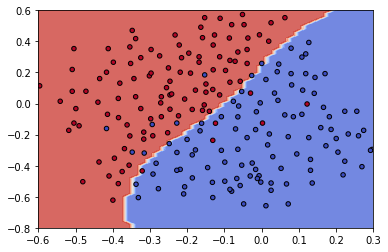

In [113]:
clf, title, ax = model, 'SVC with rbf kernel', plt
plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.flatten(), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.xlim(-0.6, 0.3)
ax.ylim(-0.8, 0.6)
plt.show()